# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [ ]:
def apply_svd_custom(X_train, X_test, n_components):
  def compute_svd(A):
      V = np.dot(A.T, A)
      e_values, e_vectors  = np.linalg.eigh(V)
      reversed_evals = np.argsort(e_values)[::-1]
      e_values = e_values[::-1]
      firstZeroIndex = len(e_values) - 1
      for i in range(len(e_values)):
          if e_values[i] <= 0:
              firstZeroIndex = i
              break

      e_values = e_values[:firstZeroIndex]
      reversed_evals = reversed_evals[:firstZeroIndex]
      e_vectors = e_vectors[:,reversed_evals]

      singular_val = np.sqrt(e_values)
      U = np.dot(A,e_vectors)/singular_val
      return U, singular_val, e_vectors.T

  def reduce(U, S, Vh, n_components):
    return np.dot(U[:, :n_components], np.diag(S[:n_components]))

  train_U, train_S, train_Vh = compute_svd(X_train.to_numpy())
  reduced_X_train = reduce(train_U, train_S, train_Vh, n_components)

  test_U, test_S, test_Vh = compute_svd(X_test.to_numpy())
  reduced_X_test = reduce(test_U, test_S, test_Vh, n_components)

  return reduced_X_train, train_Vh, reduced_X_test, test_Vh

## Part 3: Train Logistic Regression and Measure Performance

In [ ]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [10]:
svd_components = [5*k for k in range(1,21)]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, train_Vh, X_test_svd, test_Vh = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")
    results.append((n_components, accuracy, training_time))

top_5 = test_Vh[:5]

Training models with different levels of SVD preprocessing...
Applying custom SVD with 5 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 5, Accuracy: 0.6537, Training time: 1.2498 seconds
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.6997, Training time: 1.1742 seconds
Applying custom SVD with 15 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 15, Accuracy: 0.5939, Training time: 4.2014 seconds
Applying custom SVD with 20 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.5476, Training time: 2.3504 seconds
Applying custom SVD with 25 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 25, Accuracy: 0.5513, Training time: 3.5250 seconds
Applying custom SVD with 30 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 30, Accuracy: 0.5486, Training time: 4.4507 seconds
Applying custom SVD with 35 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 35, Accuracy: 0.5296, Training time: 6.1919 seconds
Applying custom SVD with 40 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 40, Accuracy: 0.5129, Training time: 14.1618 seconds
Applying custom SVD with 45 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 45, Accuracy: 0.5099, Training time: 20.3781 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.5078, Training time: 15.6837 seconds
Applying custom SVD with 55 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 55, Accuracy: 0.5013, Training time: 18.3548 seconds
Applying custom SVD with 60 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 60, Accuracy: 0.4968, Training time: 19.8778 seconds
Applying custom SVD with 65 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 65, Accuracy: 0.4940, Training time: 23.0172 seconds
Applying custom SVD with 70 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 70, Accuracy: 0.4946, Training time: 22.5254 seconds
Applying custom SVD with 75 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 75, Accuracy: 0.4937, Training time: 34.1912 seconds
Applying custom SVD with 80 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 80, Accuracy: 0.4936, Training time: 65.2184 seconds
Applying custom SVD with 85 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 85, Accuracy: 0.4939, Training time: 56.7339 seconds
Applying custom SVD with 90 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 90, Accuracy: 0.4982, Training time: 56.7399 seconds
Applying custom SVD with 95 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 95, Accuracy: 0.4984, Training time: 72.7748 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.4966, Training time: 70.7421 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


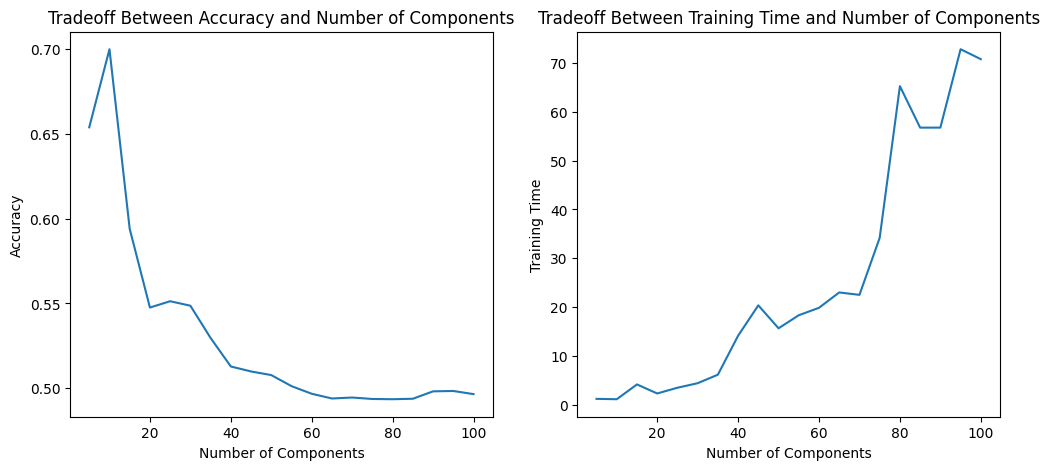

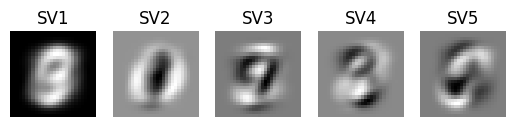

In [12]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

fig,(accuracy,train_time) = plt.subplots(1,2, figsize=(12,5))

#Accuracy Graph
accuracy.set_title('Tradeoff Between Accuracy and Number of Components')
accuracy.set_ylabel('Accuracy')
accuracy.set_xlabel('Number of Components')
accuracy.plot([item[0] for item in results], [item[1] for item in results])

#Training Time Graph
train_time.set_title('Tradeoff Between Training Time and Number of Components')
train_time.set_ylabel('Training Time')
train_time.set_xlabel('Number of Components')
train_time.plot([item[0] for item in results], [item[2] for item in results])
plt.show()
#Top 5 Singular Vectors
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(top_5[i].reshape((28,28)),cmap='gray')
    plt.title(f'SV{i+1}')
    plt.axis('off')
plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER:

According to the Accuracy Graph, the highest accuracy of 0.6997 was produced when the top 10 standard vectors were used to reduce the number of components.The graph also displays that increasing the number of components to 60 and beyond didn't have much visable effect on the accuracy which could be the result of the data overfitting on the training set past 60 components. The training graph on the other hand, appears to have a positive correlation with the number of components and training time so we can infer that the higher the number of components the longer it takes to train the data. SV1 appears to be the most distinct resembeling the number 3, because of the contrast of the black background and the white writing. SV1 has a black background as opposed to the others with a gray background which indicates that increasing the number of components increases the variance in an image. In addition, the black background in SV1 indicates that a a majority of the dataset are numbers on a black background as well which is consistent with the MNIST dataset.